## Food 101 Image Classification Challenge Problem

### Summary

- **Model** : **ResNet50**
- **Training Epochs** : **16**
- **Random Transform with TTA**
- `top_1_accuracy:`  **89.63%**      
  `top_5_accuracy:`  **98.04%**

### Problem background
- The recent advent of deep learning technologies has achieved successes incomputer vision areas. But the status quo of computer vision and pattern recognition is still far from matching human capabilities, especially when it comes to classifying an image whose intra-category appearance might present more differences than its intercategory counterparts. 
- How to use the deep learning algorithm to classify the Food Images is a challengen problem. Also with high accuracy results, the solution of this probelm can been applied a lot of areas, such as marketing promotions, social media applications. It has the hugh business potential values.

### Data EDA and Data Augmentation
- In this notebook, we will build the pipeline from the raw dataset to model training by using Fastai data block API
- Data exploration is the key for understanding the problems. we will plot the data images throught different ways to understand the dataset
- Data augmentation is the key to improve the result in computer vision projects. In this notebook, we will use the simple and random transform to explore and train the model. Also will apply the augmentation in the test time to increase the accuracy

### Model training and SoTA results
- Deep Convolution Neural Network model have achieved remarkable results in image classification problems. For food 101 data the current SoTA results are:
    -  **InceptionV3** : 88.28% / 96.88% (Top 1/Top 5)
    -  **ResNet200** : 90.14% (Top 1)
    -  **WISeR** :  90.27% / 98.71%  (Top 1/Top 5)

- **My Results**: By using the pre-trained ResNet50 model, started by training the network with an image size of 224x224 for 16 epochs , training on image size of 512x512 for additional 16 epochs.   
   `top_1_accuracy:`  **89.63%**      
   `top_5_accuracy:`  **98.04%**
   
### Development Enviroment
- The whole training and development environment is on Google Cloud Platform
- The Deep Learning frame work is based on Fastai/PyTorch



### 1. Data Set

- This dataset consists of 101 food categories, with 101'000 images. For each class, 250 manually reviewed test images are provided as well as 750 training images. On purpose, the training images were not cleaned, and thus still contain some amount of noise. This comes mostly in the form of intense colors and sometimes wrong labels. All images were rescaled to have a maximum side length of 512 pixels. The detailed information can be found this website https://www.vision.ee.ethz.ch/datasets_extra/food-101/

- Data Set Structure
    - All images can be found in the "images" folder and are organized per class. All image ids are unique and correspond to the foodspotting.com review ids. Thus the original articles can retrieved trough http://www.foodspotting.com/reviews/<image_id> or through the foodspotting api (http://www.foodspotting.com/api).
    
- Train and Test Data Set
   - In meta directory, the dataset provides the data train/test files list. Dataset has not imbalance problem.
   - For each category, 250 images are in the test set and 750 for the training set. The training set is split into 20% for the validation set and 80% for the training set.
   - Total Training set: 60600 images
   - Total Validation set: 15150 images
   - Total Test set: 25250 images

### 2. Data Exploration

#### In the Data exploration part, this notebook will use Fasiai Data Block API to build the `DataBunch` from the raw Data Set to feed the Model. 

#### 2.1 Datablock API

- The data block API will customize the creation of a DataBunch by isolating the underlying parts of that process in separate blocks. For the food-101 data set, this notebook will create the data from data frame. 
- The steps are as following:
    - Define the function `build_data_frame(path_name, file_name, img_format = 'jpg')` to create the data frame
    - Build the databunch via `ImageList.from_df`
    - Add the split the data into a training and validation sets?
    - Add the label the inputs?
    - Add data augment transforms
    - add the test set?
    - Wrap in dataloaders and create the DataBunch?
    
#### 2.1 Explore the Data set images

- Exploring and showing the images are important for the image classfication problems.This part will show the image from the three ways:
    - show images from the Databunch
    - show images from the same class /w Data Augmentation
        - define the functions `show_class_images` and `show_class_images_with_tfms`
    - show single /w Data Augmentation 
        - define the functions `show_img_augmentation`
        
### 3. Data Augmentation

- Data augmentation is a strategy that enables deep learning algorithm to significantly increase the diversity of data available for training models, without actually collecting new data. Data augmentation techniques such as cropping, padding, and horizontal flipping are commonly used to train large neural networks. However, most approaches used in training neural networks only use basic types of augmentation. While neural network architectures have been investigated in depth, less focus has been put into discovering strong types of data augmentation and data augmentation policies that capture data invariances.So in this notebook will use the random transforms which apply flip, warp, rotate,zoom,lighting and contrast randomly

- Explore the basic Data augmentation transform in show-image functions
    - the basic the transform parameters will be defined as:
        - `max_rotate=15, max_zoom=1.3, max_lighting=0.4, max_warp=0.4,p_affine=1., p_lighting=1.`
        
- Random Data Augmentation Transform for model training
    - Random transform will increase the variety of image samples and prevents overfitting. Randomly applying the rotate, zoom,lighting,warp and etc. 
    - Transform on training set: 
        - `Crop_pads, Affine_flip,Coord_warp,Affine_rotate,Affine_zoom,Lighting_brightness,Lighting_contrast`
    - Transform on validation set:
        - `Crops`

### 4. Model Training

- The results of the SoTA models for food classification are as following:
    - **InceptionV3** : by Hassannejad, Hamid, et al. ["Food Image Recognition Using Very Deep Convolutional Networks." Proceedings of the 2nd International Workshop on Multimedia Assisted Dietary Management. ACM, 2016.](http://dl.acm.org/citation.cfm?id=2986042)
        - Top-1 Accuracy : 88.28% 
        - Top-5 Accuracy : 96.88%
        - Augmentation: Flip, Rotation, Color and Zoom
        - Crops: 10 crops for validation
      
    - **ResNet200**: by Keun-dong Lee, et al.[NVIDIA DEEP LEARNING CONTEST 2016.](https://www.gputechconf.co.kr/assets/files/presentations/2-1650-1710_DL_Contest_%EC%A7%80%EC%A0%95%EC%A3%BC%EC%A0%9C_%EB%8C%80%EC%83%81.pdf)
        - Top-1 Accuracy : 90.14% (78 epoch)
        - Crops: Multi-Crops evaluation
    - **WISeR** : by . Martinel,et al. [Wide-Slice Residual Networks for Food Recognition.](https://arxiv.org/pdf/1612.06543.pdf)
        - Top-1 Accuracy : 90.27% 
        - Top-5 Accuracy : 98.71%
        - Augmentation: Flip, Rotation, Color and Zoom
        - Crops: 10 crops for validation
 
- From the SoTA models, the best archtecture is based on ResNet-ish model. I will use the standard **ResNet50** pre-trained model for training
    - First Step: Train images size 224x224 until the *Loss* started to converge **16 epoch**
    - Second Step: Train images size 512x512,  **16 epoch**

### 5. Evaluate and Test
- Test-Time Augmentation is an application of data augmentation to the test dataset. Applied the TTA into the test cases has impoved the accuracy. Specifically, it involves creating multiple augmented copies of each image in the test set, having the model make a prediction for each, then returning an ensemble of those predictions.
- Without TTA prediction:
    -  `top_1_accuracy:`  **88.36%**   
    -  `top_5_accuracy:`  **97.76%**   
    
- Applied TTA prediction:
    - `top_1_accuracy:`  **89.63%**   
    - `top_5_accuracy:`  **98.04%**

### 6. Results Analysis

#### Apply ClassificationInterpretation Interpretation methods for analyzing the results, furthermore, from the top losses cases, it is more easier to tune the data augmenetation parameters or focus on the specific class to train again.

- Investigate the Top losses by using `plot_top_losses` method
- `most_confused` method will give us the sorted descending list of largest non-diagonal entries of confusion matrix, presented as actual, predicted, number of occurrences.


### 7. Future Work

- For other cases, based on the most confused matrix and top losses plot images, we could adjust the augmentation hyper-parameters 
- For some cases, we could specially only train the some classes and improve their accuracy
- Use more deeper network or newer structure, such as **ResNet200** or **EfficientNet** to train the model






## Data Exploration 

### 1. Build Data Frame from the source files

In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
# imports
from fastai import *
from fastai.vision import *
from fastai.callbacks.hooks import *

import seaborn as sns

In [3]:
path = Path('data/food-101')
path_meta = path /'meta'
path_images = path/'images'

In [4]:
path_meta


PosixPath('data/food-101/meta')

In [5]:
def build_data_frame(path_name, file_name, img_format = 'jpg'):
    """
    build_data_frame input the path and file name, the function will return the dataframe with two columns:
    ['label'] : image label
    ['image_file'] : image file name with directory information
    input paramters:
    path_name : path 
    file_name : file name, string
    img_format : default format is jpg
    
    return dataframe
    """
    path_file = path_name/file_name
    file_df = pd.read_csv(path_file,delimiter='/', header=None, names=['label', 'image_file'])
    file_df['image_file'] = file_df['label'].astype(str) + '/' + file_df['image_file'].astype(str) + '.'+img_format
    
    return file_df

In [6]:
train_df = build_data_frame(path_meta, 'train.txt')
test_df = build_data_frame(path_meta, 'test.txt')


In [7]:
train_df.head()

label             image_file
0  apple_pie  apple_pie/1005649.jpg
1  apple_pie  apple_pie/1014775.jpg
2  apple_pie  apple_pie/1026328.jpg
3  apple_pie  apple_pie/1028787.jpg
4  apple_pie  apple_pie/1043283.jpg

In [8]:
test_df.head()

label             image_file
0  apple_pie  apple_pie/1011328.jpg
1  apple_pie   apple_pie/101251.jpg
2  apple_pie  apple_pie/1034399.jpg
3  apple_pie   apple_pie/103801.jpg
4  apple_pie  apple_pie/1038694.jpg

### 2. Data Block API 
- The data block API lets you customize the creation of a DataBunch by isolating the underlying parts of that process in separate blocks, mainly:
 - Where are the inputs and how to create them?
 - How to split the data into a training and validation sets?
 - How to label the inputs?
 - What transforms to apply?
 - How to add a test set?
 - How to wrap in dataloaders and create the DataBunch?
 
- Build Data Block from dataframe

In [9]:
bs = 64

In [10]:
# Explore the dataset

train_data = ImageList.from_df(df=train_df,path=path_images, cols=1)\
              .split_by_rand_pct(0.2)\
              .label_from_df(cols=0)\
              .transform(get_transforms(), size=224)\
              .databunch(bs=bs)
 
              

In [11]:
train_data

ImageDataBunch;

Train: LabelList (60600 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
apple_pie,apple_pie,apple_pie,apple_pie,apple_pie
Path: data/food-101/images;

Valid: LabelList (15150 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
macarons,poutine,red_velvet_cake,bibimbap,pad_thai
Path: data/food-101/images;

Test: None

In [12]:
print('Total data classes:',str(len(train_data.classes)))
print('Food Classes: \n', train_data.classes)

Total data classes: 101
Food Classes: 
 ['apple_pie', 'baby_back_ribs', 'baklava', 'beef_carpaccio', 'beef_tartare', 'beet_salad', 'beignets', 'bibimbap', 'bread_pudding', 'breakfast_burrito', 'bruschetta', 'caesar_salad', 'cannoli', 'caprese_salad', 'carrot_cake', 'ceviche', 'cheese_plate', 'cheesecake', 'chicken_curry', 'chicken_quesadilla', 'chicken_wings', 'chocolate_cake', 'chocolate_mousse', 'churros', 'clam_chowder', 'club_sandwich', 'crab_cakes', 'creme_brulee', 'croque_madame', 'cup_cakes', 'deviled_eggs', 'donuts', 'dumplings', 'edamame', 'eggs_benedict', 'escargots', 'falafel', 'filet_mignon', 'fish_and_chips', 'foie_gras', 'french_fries', 'french_onion_soup', 'french_toast', 'fried_calamari', 'fried_rice', 'frozen_yogurt', 'garlic_bread', 'gnocchi', 'greek_salad', 'grilled_cheese_sandwich', 'grilled_salmon', 'guacamole', 'gyoza', 'hamburger', 'hot_and_sour_soup', 'hot_dog', 'huevos_rancheros', 'hummus', 'ice_cream', 'lasagna', 'lobster_bisque', 'lobster_roll_sandwich', 'mac

### 3. Explore the Image

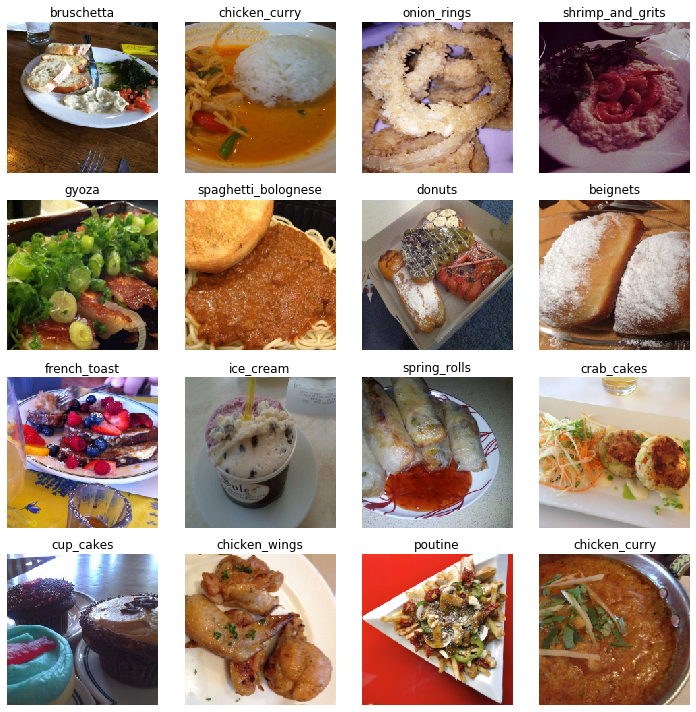

In [13]:
train_data.show_batch(rows=4, figsize=(10, 10))


In [14]:
train_data.classes[0]

'apple_pie'

### 3.1 Explore each Class images
- Build the two functions
  - function `build_class_data` is to build all same class images via Data Block API
  - function `show_class_images` is to show images of each class

In [15]:
np.random.seed(2)
def build_class_data(class_name):
    
    class_path = path_images/class_name
    fnames = get_image_files(class_path)
    pat = r'/([^/]+)/\d+.jpg$'
    class_data = ImageDataBunch.from_name_re(class_path, fnames, pat, ds_tfms=get_transforms(), size=224, bs=bs
                                  ).normalize(imagenet_stats)

    return class_data



In [16]:
def show_class_images(class_name, row_number = 4, fig_size = (10,10)):
    
    class_data = build_class_data(class_name)
    print('Class Name: ', class_name)
    class_data.show_batch(rows=row_number, figsize=fig_size)
    
    return

    

Class Name:  apple_pie


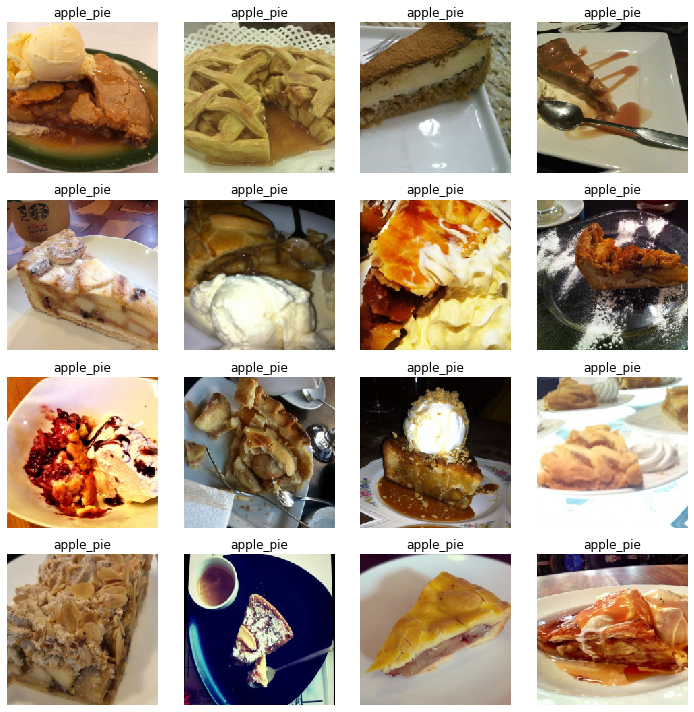

In [17]:
show_class_images(train_data.classes[0])


Class Name:  bruschetta


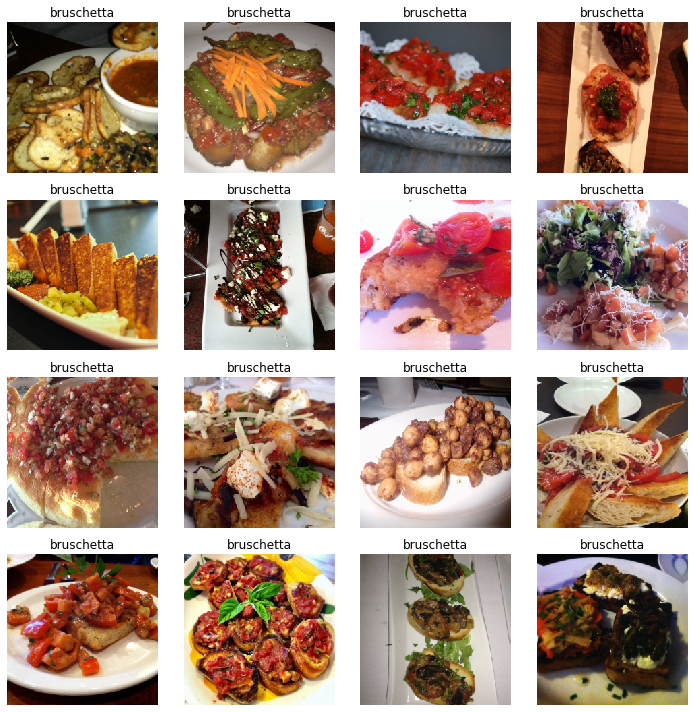

In [18]:
show_class_images(train_data.classes[10])

### 4. Data Augmentation

- `Data augmentation` is perhaps the most important regularization technique when training a model for Computer Vision: instead of feeding the model with the same pictures every time, we do small random transformations (a bit of rotation, zoom, translation, etc...) that don't change what's inside the image (to the human eye) but do change its pixel values. Models trained with data augmentation will then generalize better.

- Define two functions to build class data and show images of each class with data augmentation parameters:
    - `build_class_data_with_tfms` : build class data with data augmentation
    - `show_class_images_with_tfms`: show class images with data augmentation

In [19]:
tfms = get_transforms(max_rotate=15, max_zoom=1.3, max_lighting=0.4, max_warp=0.4,
                      p_affine=1., p_lighting=1.)

In [20]:
def build_class_data_with_tfms(class_name, padding_mode):
    
    class_path = path_images/class_name
    fnames = get_image_files(class_path)
    pat = r'/([^/]+)/\d+.jpg$'
    class_data = ImageDataBunch.from_name_re(class_path, fnames, pat, \
                                             ds_tfms=tfms, size=224, \
                                             padding_mode=padding_mode,\
                                             bs=bs)\
                                            .normalize(imagenet_stats)

    return class_data

In [21]:
def show_class_images_with_tfms(class_name,padding_mode, row_number = 4, fig_size = (10,10)):
    
    class_data = build_class_data_with_tfms(class_name,padding_mode)
    print('Class Name: ', class_name)
    class_data.show_batch(rows=row_number, figsize=fig_size)
    
    return

Class Name:  apple_pie


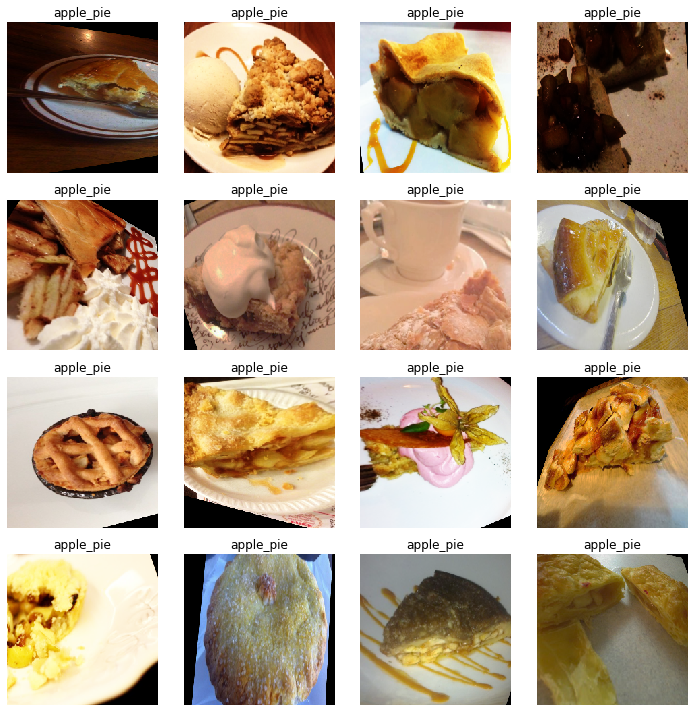

In [22]:
show_class_images_with_tfms(train_data.classes[0],padding_mode = 'zeros')

### Show single image with data augmentation

In [23]:
fnames = get_image_files(path_images/train_data.classes[0])

In [24]:
fnames[1]

PosixPath('data/food-101/images/apple_pie/3192774.jpg')

In [25]:
def show_img_augmentation(image_file_name, rows=3,cols=3,width=9,height=9):
    
    img = open_image(image_file_name)
    print('Image Before/After Augmentation:')
    img.show()
    

    [img.apply_tfms(get_transforms()[0]).show(ax=ax) \
      for i,ax in enumerate(plt.subplots(rows,cols,figsize=(width,height))[1].flatten())];
    
    return

    

Image Before/After Augmentation:


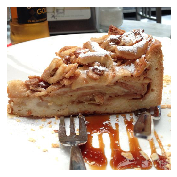

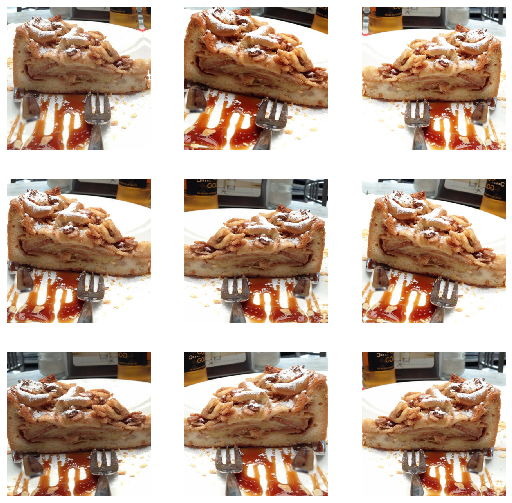

In [26]:
show_img_augmentation(get_image_files(path_images/train_data.classes[0])[10])

### 4. Model Training

- Applying Deep learning models into Food Recognition has achieved a lot of progresses. The popular method is to use pre-trained model and transfer learning. 
- The results of the SoTA models for food classification are as following:
    - **InceptionV3** : by Hassannejad, Hamid, et al. ["Food Image Recognition Using Very Deep Convolutional Networks." Proceedings of the 2nd International Workshop on Multimedia Assisted Dietary Management. ACM, 2016.](http://dl.acm.org/citation.cfm?id=2986042)
        - Top-1 Accuracy : 88.28% 
        - Top-5 Accuracy : 96.88%
        - Augmentation: Flip, Rotation, Color and Zoom
        - Crops: 10 crops for validation
      
    - **ResNet200**: by Keun-dong Lee, et al.[NVIDIA DEEP LEARNING CONTEST 2016.](https://www.gputechconf.co.kr/assets/files/presentations/2-1650-1710_DL_Contest_%EC%A7%80%EC%A0%95%EC%A3%BC%EC%A0%9C_%EB%8C%80%EC%83%81.pdf)
        - Top-1 Accuracy : 90.14% (78 epoch)
        - Crops: Multi-Crops evaluation
    - **WISeR** : by . Martinel,et al. [Wide-Slice Residual Networks for Food Recognition.](https://arxiv.org/pdf/1612.06543.pdf)
        - Top-1 Accuracy : 90.27% 
        - Top-5 Accuracy : 98.71%
        - Augmentation: Flip, Rotation, Color and Zoom
        - Crops: 10 crops for validation
 
- From the SoTA models, the best archtecture is based on ResNet-ish model. I will use the standard **ResNet50** pre-trained model for training
    - First Step: Train images size 224x224 until the *Loss* started to converge
    - Second Step: Train images size 512x512


### 4.1 Set the Data Augmentation Parameters

#### Random Augmentation
- Reference : Fastai [RandTransform](https://docs.fast.ai/vision.image.html#RandTransform) 

- Each argument of `func` in kwargs is analyzed and if it has a type annotaiton that is a random function, this function will be called to pick a value for it. This value will be stored in the `resolved` dictionary. Following the same idea, `**p**`is the probability for func to be called and do_run will be set to True if it was the cause, False otherwise. Setting is_random to False allows to send specific values for each parameter. use_on_y is a parameter to further control transformations for targets (e.g. Segmentation Masks). Assuming transformations on labels are turned on using tfm_y=True (in your Data Blocks pipeline), use_on_y=False can disable the transformation for labels.

- tfms input is a tuple of two Transform lists. The first list is applied on training set, the second one is applied on validation set

In [27]:
Crop_pads = RandTransform(tfm=TfmCrop(crop_pad),\
                       kwargs={'row_pct': (0, 1), 'col_pct': (0, 1), 'padding_mode': 'reflection'}, \
                       p=1.0, \
                       resolved={}, \
                       do_run=True, \
                       is_random=True)

Affine_flip = RandTransform(tfm=TfmAffine(flip_affine),\
                            kwargs={}, \
                            p=0.5, \
                            resolved={}, \
                            do_run=True, \
                            is_random=True)

Coord_warp = RandTransform(tfm=TfmCoord(symmetric_warp), \
                           kwargs={'magnitude': (-0.2, 0.2)}, \
                           p=0.75, \
                           resolved={}, \
                           do_run=True, \
                           is_random=True)

Affine_rotate = RandTransform(tfm=TfmAffine(rotate),\
                              kwargs={'degrees': (-20.0, 20.0)}, \
                              p=0.75, \
                              resolved={}, \
                              do_run=True, \
                              is_random=True)

Affine_zoom = RandTransform(tfm=TfmAffine(zoom), \
                            kwargs={'scale': (1.0, 1.3), 'row_pct': (0, 1), 'col_pct': (0, 1)}, \
                            p=0.75, \
                            resolved={}, \
                            do_run=True, \
                            is_random=True)

Lighting_brightness = RandTransform(tfm=TfmLighting(brightness), \
                         kwargs={'change': (0.4, 0.6)}, \
                         p=0.75, \
                         resolved={}, \
                         do_run=True, \
                         is_random=True)

Lighting_contrast = RandTransform(tfm=TfmLighting(contrast),\
                                  kwargs={'scale': (0.8, 1.25)}, \
                                  p=0.75, \
                                  resolved={}, \
                                  do_run=True,\
                                  is_random=True)

Crops = RandTransform(tfm=TfmCrop(crop_pad), \
                      kwargs={}, \
                      p=1.0, \
                      resolved={},\
                      do_run=True, \
                      is_random=True)

# Training Set Random Augmentation
train_tfms = [Crop_pads,Affine_flip,Coord_warp,Affine_rotate,Affine_zoom,Lighting_brightness,Lighting_contrast]

# validation set Random Augmentation
valid_tfms = [Crops]

random_tfms = (train_tfms,valid_tfms)


In [28]:

train_model_data = (ImageList.from_df(df=train_df,path=path_images, cols=1)\
                            .split_by_rand_pct(0.2)\
                            .label_from_df(cols=0)\
                            .transform(random_tfms, size=224)\
                            .databunch(bs=bs)\
                            .normalize(imagenet_stats))


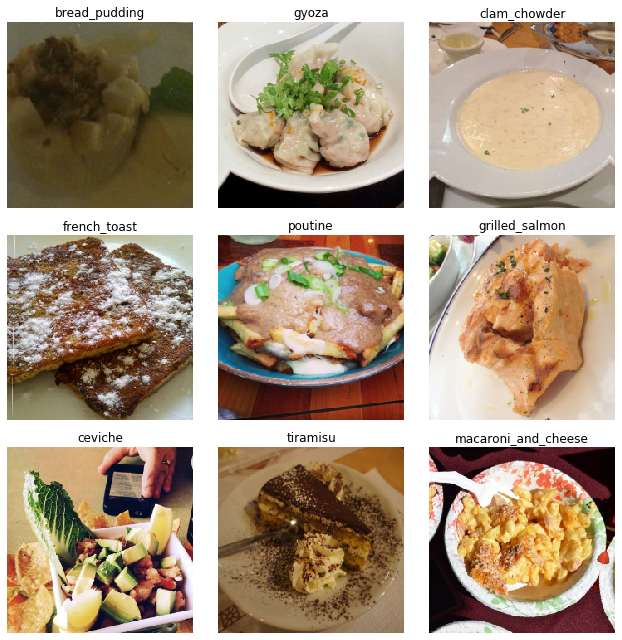

In [29]:
train_model_data.show_batch(rows=3, figsize=(9, 9))


### 4.2 Metrics

**Top-1 Accuracy** and **Top-5 Accuracy** are standard metrics for the image classification problems. I will use the these two metrics to compare with the SoTA results


In [30]:
top_5_accuracy = partial(top_k_accuracy, k=5)

learn = cnn_learner(train_model_data, models.resnet50, metrics=[accuracy, top_5_accuracy], callback_fns=ShowGraph)

### 4.3 Model Structure

In [31]:
learn.model[1]

Sequential(
  (0): AdaptiveConcatPool2d(
    (ap): AdaptiveAvgPool2d(output_size=1)
    (mp): AdaptiveMaxPool2d(output_size=1)
  )
  (1): Flatten()
  (2): BatchNorm1d(4096, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (3): Dropout(p=0.25, inplace=False)
  (4): Linear(in_features=4096, out_features=512, bias=True)
  (5): ReLU(inplace=True)
  (6): BatchNorm1d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (7): Dropout(p=0.5, inplace=False)
  (8): Linear(in_features=512, out_features=101, bias=True)
)

In [32]:
learn.model

Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): Bottleneck(
        (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (downsample): Sequential(
          (0): Conv2d(64, 256

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


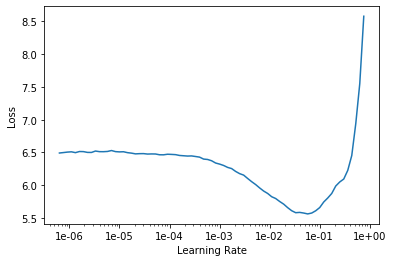

In [33]:
learn.lr_find()
learn.recorder.plot()

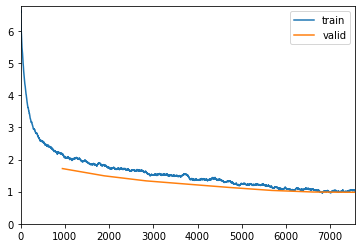

In [34]:
lr = 1e-2
learn.fit_one_cycle(8, slice(lr))
learn.save('food-101-ResNet50-1e-2-v2')

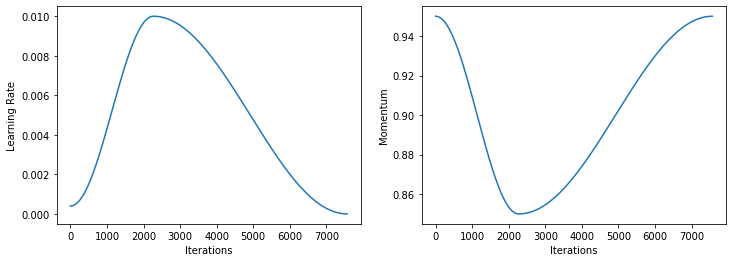

In [35]:
# the learning rate and momentum scheduling 
learn.recorder.plot_lr(show_moms=True)

### Unfreeze ResNet50 Model 

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.
Min numerical gradient: 6.31E-07
Min loss divided by 10: 2.29E-07


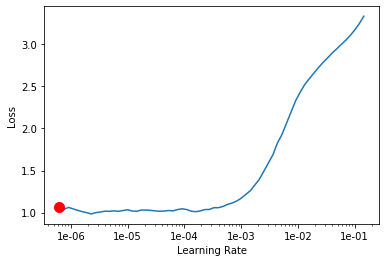

In [36]:
learn.unfreeze()
learn.lr_find()
learn.recorder.plot(suggestion=True)

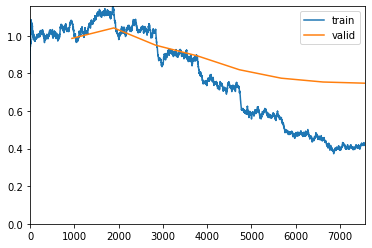

In [37]:
learn.fit_one_cycle(8, max_lr=slice(1e-5, 1e-3))
learn.save('food-101-ResNet50-1e-5-3')

In [31]:
learn.load('food-101-ResNet50-1e-5-3')

Learner(data=ImageDataBunch;

Train: LabelList (60600 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
apple_pie,apple_pie,apple_pie,apple_pie,apple_pie
Path: data/food-101/images;

Valid: LabelList (15150 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
hummus,scallops,peking_duck,chicken_quesadilla,baby_back_ribs
Path: data/food-101/images;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): Bottleneck(
        (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn1): BatchN

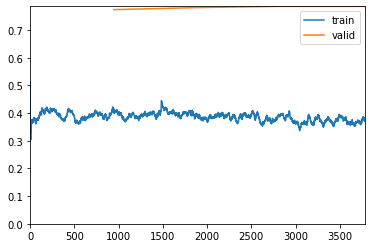

PosixPath('data/food-101/images/models/food-101-ResNet50-1e-6-3-v2.pth')

In [32]:
learn.fit_one_cycle(4, max_lr=slice(1e-6, 1e-3))
learn.save('food-101-ResNet50-1e-6-3-v2', return_path=True)

### Training on image size: 512x512

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


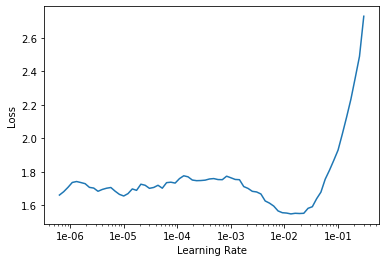

In [33]:
bs_512 = int(bs/2)
train_model_data = (ImageList.from_df(df=train_df,path=path_images, cols=1)\
                            .split_by_rand_pct(0.2)\
                            .label_from_df(cols=0)\
                            .transform(random_tfms, size=512)\
                            .databunch(bs=bs_512)\
                            .normalize(imagenet_stats))

learn = cnn_learner(train_model_data, models.resnet50, metrics=[accuracy, top_5_accuracy], callback_fns=ShowGraph)
learn.load('food-101-ResNet50-1e-6-3-v2')

learn.lr_find()
learn.recorder.plot()

### Unfreeze 

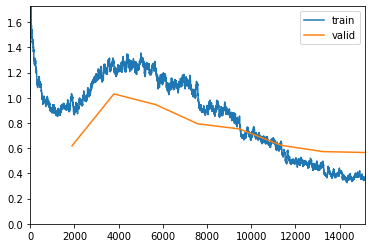

PosixPath('data/food-101/images/models/food-101-ResNet50-1e-7-2-v2-512.pth')

In [34]:
learn.unfreeze()
learn.fit_one_cycle(8, max_lr=slice(1e-6, 1e-2))
learn.save('food-101-ResNet50-1e-7-2-v2-512', return_path=True)

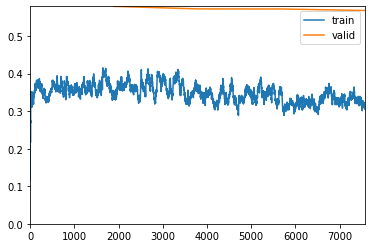

PosixPath('data/food-101/images/models/food-101-ResNet50-1e-8-3-v2-512.pth')

In [35]:
learn.fit_one_cycle(4, max_lr=slice(1e-8, 1e-3))
learn.save('food-101-ResNet50-1e-8-3-v2-512', return_path=True)

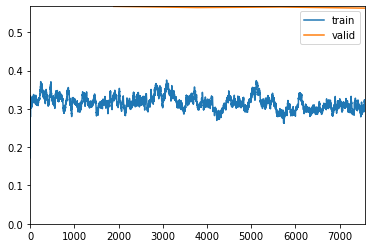

PosixPath('data/food-101/images/models/food-101-ResNet50-1e-57-55-v2-512.pth')

In [36]:
learn.fit_one_cycle(4, max_lr=slice(5e-7,5e-5))
learn.save('food-101-ResNet50-1e-57-55-v2-512', return_path=True)

In [37]:
learn.load('food-101-ResNet50-1e-8-3-v2-512')


Learner(data=ImageDataBunch;

Train: LabelList (60600 items)
x: ImageList
Image (3, 512, 512),Image (3, 512, 512),Image (3, 512, 512),Image (3, 512, 512),Image (3, 512, 512)
y: CategoryList
apple_pie,apple_pie,apple_pie,apple_pie,apple_pie
Path: data/food-101/images;

Valid: LabelList (15150 items)
x: ImageList
Image (3, 512, 512),Image (3, 512, 512),Image (3, 512, 512),Image (3, 512, 512),Image (3, 512, 512)
y: CategoryList
nachos,red_velvet_cake,fried_rice,spaghetti_carbonara,club_sandwich
Path: data/food-101/images;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): Bottleneck(
        (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn1): 

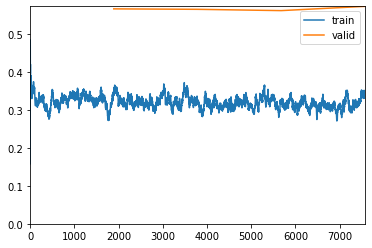

In [38]:
learn.fit_one_cycle(4, max_lr=slice(1e-9, 1e-4))
learn.save('food-101-ResNet50-1e-9-4-v2-512')

### 5. Evaluation and Test

- Apply the test augmentation will improve the accuracy. Two ways of evaluation will be performed
    - Without TTA 
    - with TTA
    

In [34]:
test_model_data = (ImageList.from_df(df=test_df,path=path_images, cols=1)\
                            .split_none()\
                            .label_from_df(cols=0)\
                            .transform(random_tfms,size=512)\
                            .databunch(bs=bs_512)\
                            .normalize(imagenet_stats))

learn = cnn_learner(test_model_data, models.resnet50, metrics=[accuracy, top_5_accuracy], callback_fns=ShowGraph)

#learn.load('food-101-ResNet50-1e-9-4-v2-512')
learn.load('food-101-ResNet50-1e-57-55-v2-512')

Learner(data=ImageDataBunch;

Train: LabelList (25250 items)
x: ImageList
Image (3, 512, 512),Image (3, 512, 512),Image (3, 512, 512),Image (3, 512, 512),Image (3, 512, 512)
y: CategoryList
apple_pie,apple_pie,apple_pie,apple_pie,apple_pie
Path: data/food-101/images;

Valid: LabelList (0 items)
x: ImageList

y: CategoryList

Path: data/food-101/images;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): Bottleneck(
        (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=Fa

In [35]:
#Model: food-101-ResNet50-1e-57-55-v2-512
learn.validate(test_model_data.train_dl)

[0.43441716, tensor(0.8836), tensor(0.9776)]

In [38]:
# Model: food-101-ResNet50-1e-9-4-v2-512
#learn.validate(test_model_data.train_dl)
# [0.45037287, tensor(0.8799), tensor(0.9769)]

### Test Time Augmentation Evaluation(TTA)

- Applies Test Time Augmentation to learn on the dataset ds_type. We take the average of our regular predictions (with a weight beta) with the average of predictions obtained through augmented versions of the training set (with a weight 1-beta). The transforms decided for the training set are applied with a few changes scale controls the scale for zoom (which isn't random), the cropping isn't random but we make sure to get the four corners of the image. Flipping isn't random but applied once on each of those corner images (so that makes 8 augmented versions total).

- `beta=0.4, scale=1.35` will applied in TTA prediction

In [36]:
#Model: food-101-ResNet50-1e-57-55-v2-512
y_preds_TTA, y_TTA = learn.TTA(ds_type= test_model_data,beta=0.4, scale=1.35)

top_1_accuracy_TTA = accuracy(y_preds_TTA, y_TTA)
top_5_accuracy_TTA = top_k_accuracy(y_preds_TTA, y_TTA, k=5)

print('TTA: top_1_accuracy: ',top_1_accuracy_TTA )
print('TTA: top_5_accuracy: ',top_5_accuracy_TTA )

TTA: top_1_accuracy:  tensor(0.8963)
TTA: top_5_accuracy:  tensor(0.9804)


In [44]:
# Model: food-101-ResNet50-1e-9-4-v2-512
# y_preds_TTA, y_TTA = learn.TTA(ds_type= test_model_data,beta=0.4, scale=1.35)

In [37]:
# Model: food-101-ResNet50-1e-9-4-v2-512
# top_1_accuracy_TTA = accuracy(y_preds_TTA, y_TTA)
# top_5_accuracy_TTA = top_k_accuracy(y_preds_TTA, y_TTA, k=5)

# print('TTA: top_1_accuracy: ',top_1_accuracy_TTA )
# print('TTA: top_5_accuracy: ',top_5_accuracy_TTA )

#TTA: top_1_accuracy:  tensor(0.8942)
#TTA: top_5_accuracy:  tensor(0.9804)


### 6. Result Analysis

- Apply ClassificationInterpretation Interpretation methods for analyzing the results
    - Investigate the Top losses by using `plot_top_losses` method
        -This provides a confusion matrix and visualization of the most incorrect images. Pass in your data, calculated preds, actual y, and your losses, and then use the methods below to view the model interpretation results. 
    - Show images in top_losses along with their prediction, actual, loss, and probability of actual class.
    - The 16 items are arranged as a square, The title of each image shows: prediction, actual, loss, probability of actual class. 
    - `most_confused` method will give us the sorted descending list of largest non-diagonal entries of confusion matrix, presented as actual, predicted, number of occurrences.
        

In [39]:

interp = ClassificationInterpretation.from_learner(learn, ds_type= test_model_data)



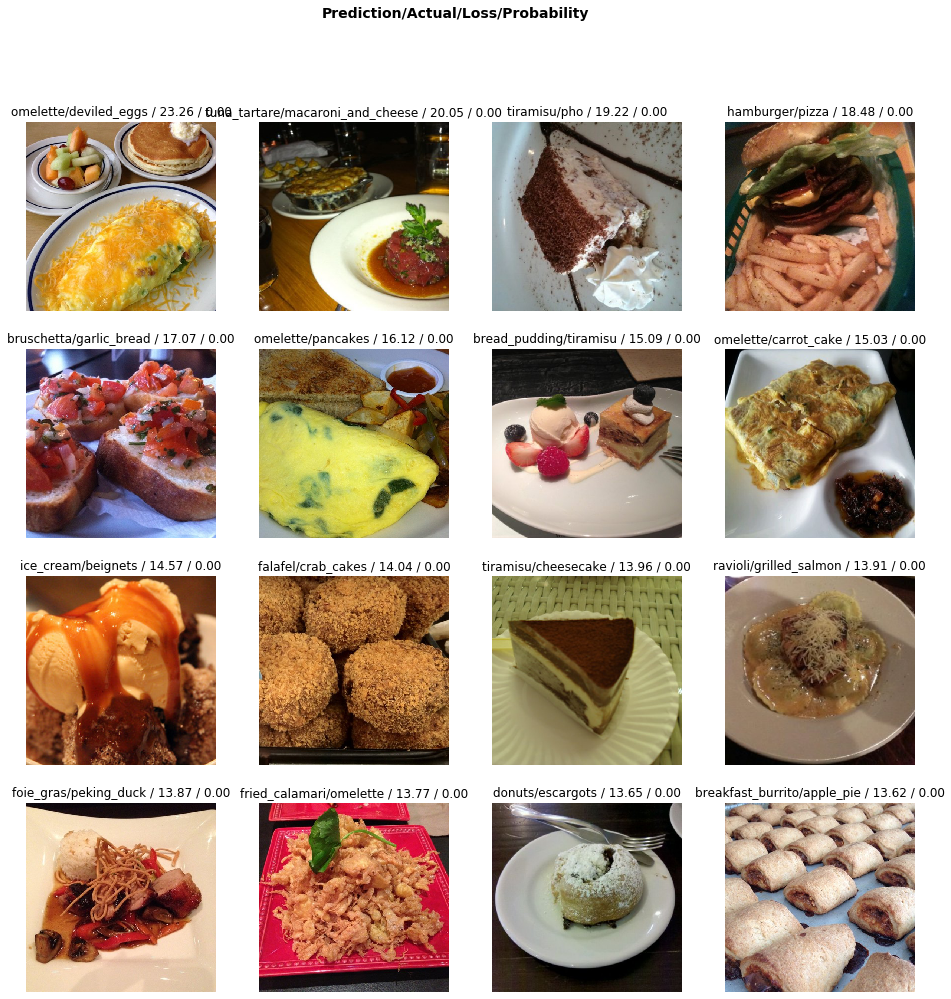

In [40]:
interp.plot_top_losses(16, figsize=(16, 16))

In [41]:
interp.most_confused(min_val=5)

[('filet_mignon', 'steak', 39),
 ('steak', 'filet_mignon', 37),
 ('chocolate_mousse', 'chocolate_cake', 24),
 ('pork_chop', 'steak', 24),
 ('chocolate_cake', 'chocolate_mousse', 20),
 ('apple_pie', 'bread_pudding', 19),
 ('beef_tartare', 'tuna_tartare', 18),
 ('tuna_tartare', 'beef_tartare', 18),
 ('prime_rib', 'steak', 16),
 ('dumplings', 'gyoza', 15),
 ('pork_chop', 'filet_mignon', 14),
 ('steak', 'prime_rib', 14),
 ('club_sandwich', 'grilled_cheese_sandwich', 13),
 ('ice_cream', 'frozen_yogurt', 13),
 ('steak', 'pork_chop', 13),
 ('bread_pudding', 'apple_pie', 12),
 ('pork_chop', 'grilled_salmon', 12),
 ('ravioli', 'lasagna', 12),
 ('baby_back_ribs', 'steak', 11),
 ('french_toast', 'bread_pudding', 11),
 ('onion_rings', 'fried_calamari', 11),
 ('falafel', 'crab_cakes', 10),
 ('chicken_quesadilla', 'breakfast_burrito', 9),
 ('chocolate_mousse', 'ice_cream', 9),
 ('chocolate_mousse', 'panna_cotta', 9),
 ('clam_chowder', 'lobster_bisque', 9),
 ('gyoza', 'dumplings', 9),
 ('lobster_bisq

### Futher work

-  Due to there are few wrong labeled images in the dataset, it will raise the noise to interfere the prediction
-  For other cases, based on the most confused matrix and top losses plot images, we could adjust the augmentation hyper-parameters 
-  For some cases, we could specially only train the some classes and improve their accuracy
-  Use more deeper network or newer structure, such as **ResNet200** or **EfficientNet** 


